In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import svm,naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


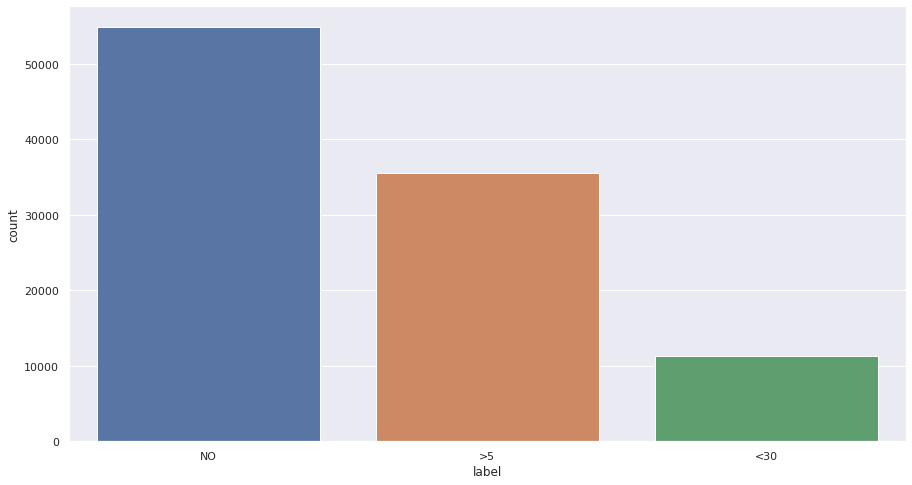

In [163]:
df=pd.read_csv('Blood_Pressure_data.csv')
g = df["label"]
sns.countplot(g)

In [164]:

# df=df.drop("id",axis=1)
# df=df.drop("patient_no",axis=1)
df=df.drop("cast",axis=1)
# df=df.drop("gender",axis=1)
df=df.drop("weight",axis=1)
# df=df.drop("admission_typeid",axis=1)
# df=df.drop("discharge_disposition_id",axis=1)
# df=df.drop("time_in_hospital",axis=1)
# df=df.drop("admission_source_id",axis=1)
df=df.drop("payer_code",axis=1)
# df=df.drop("num_lab_procedures",axis=1)
# df=df.drop("num_procedures",axis=1)
df=df.drop("medical_specialty",axis=1)
df=df.drop("diag_3",axis=1)
df=df.drop("diag_2",axis=1)
df=df.drop("diag_1",axis=1)
df=df.drop("change",axis=1)
df=df.drop("Med",axis=1)
df.head()

,id,patient_no,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,label
0,2278392,8222157,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,>5
2,64410,86047875,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3,500364,82442376,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,NO
4,16680,42519267,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,NO


In [165]:
df_copy=df.copy()
df_copy=df_copy.replace('?', np.NaN)
# df_copy["payer_code"].fillna( method ='backfill',inplace = True)
# df_copy["payer_code"].fillna('MD',inplace = True)
# df_copy["weight"].fillna( method ='backfill',inplace = True)
# df_copy["weight"].fillna('[25-50)',inplace = True)
# df_copy["cast"].fillna( method ='backfill',inplace = True)
# df_copy["medical_specialty"].fillna( method ='backfill',inplace = True)
# df_copy["medical_specialty"].fillna('Urology',inplace = True)
# df_copy["diag_1"].fillna( method ='backfill',inplace = True)
# df_copy["diag_2"].fillna( method ='backfill',inplace = True)
# df_copy["diag_3"].fillna( method ='backfill',inplace = True)
df_copy.fillna(method ='ffill',inplace = True)
df_copy.isnull().sum().sum()

0

In [166]:
data = df_copy.values
X = df_copy.drop("label", axis = 1)
d={'NO':0,'>5':1, '<30':2}
df_copy["label"]=df_copy["label"].map(d)
y = df_copy["label"]
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
label_encoder = LabelEncoder()

In [167]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc =  pd.DataFrame(X_train_sc)
X_test_sc =  pd.DataFrame(X_test_sc)

In [173]:
# decision tree
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=9)
clf = clf.fit(X_train, y_train)
pred=clf.predict(X_test)
score_dt = round(accuracy_score(pred,y_test)*100,2)
print(score_dt)
f1 = f1_score(y_test,pred,average='macro')
print(f1)

59.16
0.4235629223942932


In [174]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
nb.score(X_test_sc,y_test)
print(score_nb)
f1 = f1_score(y_test,Y_pred_nb,average='macro')
print(f1)

55.79
0.34580665907988


In [170]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train,y_train)
# Y_pred_lr = lr.predict(X_test)
# score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
# lr.score(X_test_sc,y_test)
# print(score_lr)
# f1 = f1_score(y_test,Y_pred_lr,average='macro')
# print(f1)

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
knn.score(X_test_sc,y_test)
print(score_knn)
f1 = f1_score(y_test,Y_pred_knn,average='macro')
print(f1)

55.04
0.35037866165830506


In [176]:
scores = [score_nb,score_knn,score_dt]
algorithms = ["Naive Bayes","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Naive Bayes is: 55.79 %
The accuracy score achieved using K-Nearest Neighbors is: 55.04 %
The accuracy score achieved using Decision Tree is: 59.16 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


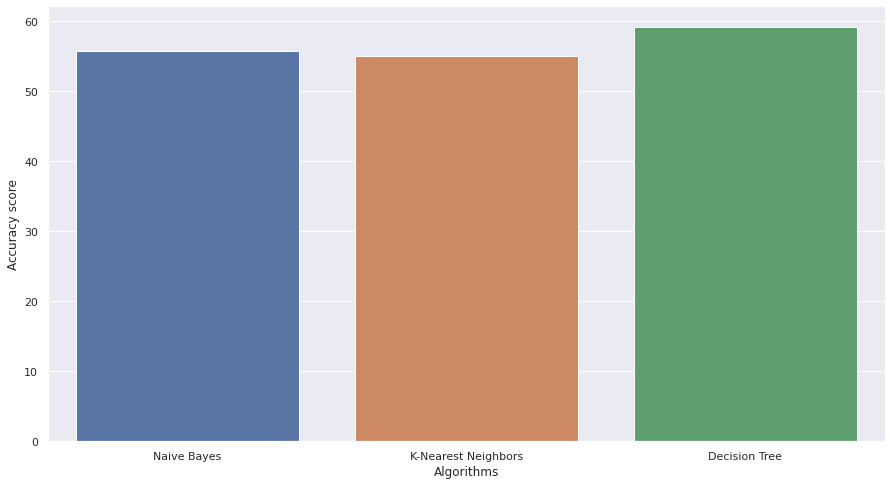

In [177]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)